# hepatitis BN stacking

Training on hepatitis dataset using bayesian_network model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "bayesian_network"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [4]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [5]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-14T19:14:32.687739+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [6]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [7]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-14T19:14:41.998181+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    34       2   34      1               1          2          1   
1576    41       2   30      1               1          2          1   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    43       2   25      2               2          1          2   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [8]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [9]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-14T19:14:52.250016+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    36       1   29      2               1          1          1   
2389    54       1   30      2               2          2          2   
2561    52       1   24      1               2          1          2   
5344    54       2   23      2               1          2          1   
3690    32       2   27      1               2          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
3772    54       2   34      2               1          2          2   
5191    53       2   27      1               2          2          2   
5226    42       1   22      2               2          2          1   
5390    46       2   35      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 2          

# syn_v4

In [10]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [11]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-14T19:15:20.791569+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    39       2   32      2               2          2          1   
4720    34       2   24      2               1          2          2   
474     41       1   31      2               1          1          2   
4874    56       2   25      1               2          1          2   
2391    38       2   31      1               2          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
5734    60       1   22      1               1          2          2   
5191    53       2   27      1               2          2          2   
5390    46       2   35      2               2          2          1   
860     52       2   28      2               2          2          1   
7270    59       1   34      2               1          2          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 1          

# syn_v5

In [12]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [13]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-14T19:17:04.465299+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     36       2   29      2               1          2          2   
558      34       1   25      1               2          1          1   
6959     36       2   31      1               2          1          2   
20195    54       2   26      2               1          2          1   
20145    55       1   26      2               1          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
11964    35       1   33      2               1          1          1   
21575    57       1   26      1               2          2          1   
5390     46       2   35      2               2          2          1   
860      52       2   28      2               2          2          1   
15795    43       1   22      2               1          1          1   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [14]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [15]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-14T19:26:25.233039+0200][5076][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     35       2   22      2               2          2          2   
11634    55       1   23      1               2          2          2   
20750    42       1   29      2               2          1          1   
3329     34       2   22      2               2          1          1   
18793    59       1   25      2               2          1          1   
...     ...     ...  ...    ...             ...        ...        ...   
12669    52       2   22      1               2          1          1   
13349    32       1   24      2               2          1          2   
6775     59       1   25      1               2          1          1   
2245     32       2   22      2               1          1          1   
17180    39       1   34      2               2          1          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [16]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.010441,0.002603,0.989559,0.002603
1,pca_eigval_diff,u,0.011968,NaN,0.988032,NaN
2,pca_eigvec_ang,u,0.271628,NaN,0.913538,NaN
3,avg_cio,u,0.466702,0.069793,0.466702,0.069793
4,corr_mat_diff,u,0.701424,NaN,0.998272,NaN
5,mutual_inf_diff,u,1.485455,NaN,0.996341,NaN
6,ks_tvd_stat,u,0.036806,0.007027,0.963194,0.007027
7,frac_ks_sigs,u,0.137931,NaN,0.862069,NaN
8,avg_h_dist,u,0.002940,0.000925,0.997060,0.000925
9,avg_pMSE,u,0.003492,0.000249,0.986031,0.000997


# Eval on syn_v2

In [17]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [18]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.013489,0.002604,0.986511,0.002604
1,pca_eigval_diff,u,0.012649,NaN,0.987351,NaN
2,pca_eigvec_ang,u,0.426165,NaN,0.864348,NaN
3,avg_cio,u,0.417961,0.076821,0.417961,0.076821
4,corr_mat_diff,u,0.811967,NaN,0.998000,NaN
5,mutual_inf_diff,u,1.490058,NaN,0.996330,NaN
6,ks_tvd_stat,u,0.039797,0.007859,0.960203,0.007859
7,frac_ks_sigs,u,0.172414,NaN,0.827586,NaN
8,avg_h_dist,u,0.002751,0.001292,0.997249,0.001292
9,avg_pMSE,u,0.006282,0.000349,0.974873,0.001394


# Eval on syn_v3

In [19]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [20]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.018233,0.002598,0.981767,0.002598
1,pca_eigval_diff,u,0.018196,NaN,0.981804,NaN
2,pca_eigvec_ang,u,0.536703,NaN,0.829162,NaN
3,avg_cio,u,0.431244,0.095467,0.431244,0.095467
4,corr_mat_diff,u,0.905383,NaN,0.997770,NaN
5,mutual_inf_diff,u,1.516735,NaN,0.996264,NaN
6,ks_tvd_stat,u,0.042773,0.008135,0.957227,0.008135
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.002636,0.001019,0.997364,0.001019
9,avg_pMSE,u,0.011996,0.000371,0.952018,0.001483


# Eval on syn_v4

In [21]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [22]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.022975,0.002609,0.977025,0.002609
1,pca_eigval_diff,u,0.021496,NaN,0.978504,NaN
2,pca_eigvec_ang,u,0.505786,NaN,0.839003,NaN
3,avg_cio,u,0.261464,0.072558,0.261464,0.072558
4,corr_mat_diff,u,0.889706,NaN,0.997809,NaN
5,mutual_inf_diff,u,1.554538,NaN,0.996171,NaN
6,ks_tvd_stat,u,0.050568,0.008941,0.949432,0.008941
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.004460,0.001577,0.995540,0.001577
9,avg_pMSE,u,0.016690,0.000589,0.933241,0.002355


# Eval on syn_v5

In [23]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [24]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.028189,0.002601,0.971811,0.002601
1,pca_eigval_diff,u,0.014753,NaN,0.985247,NaN
2,pca_eigvec_ang,u,0.470042,NaN,0.850381,NaN
3,avg_cio,u,0.340392,0.077431,0.340392,0.077431
4,corr_mat_diff,u,0.860715,NaN,0.997880,NaN
5,mutual_inf_diff,u,1.574889,NaN,0.996121,NaN
6,ks_tvd_stat,u,0.051823,0.010851,0.948177,0.010851
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.003256,0.001016,0.996744,0.001016
9,avg_pMSE,u,0.026295,0.000994,0.894822,0.003975


# Eval on synth_only_stack

In [25]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [26]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.030964,0.002610,0.969036,0.002610
1,pca_eigval_diff,u,0.029370,NaN,0.970630,NaN
2,pca_eigvec_ang,u,0.607501,NaN,0.806626,NaN
3,avg_cio,u,0.200478,0.071052,0.200478,0.071052
4,corr_mat_diff,u,0.994470,NaN,0.997551,NaN
5,mutual_inf_diff,u,1.588185,NaN,0.996088,NaN
6,ks_tvd_stat,u,0.053990,0.010198,0.946010,0.010198
7,frac_ks_sigs,u,0.241379,NaN,0.758621,NaN
8,avg_h_dist,u,0.003512,0.001158,0.996488,0.001158
9,avg_pMSE,u,0.026141,0.000462,0.895434,0.001850


# Multiple plots for evaluation comparisons

In [27]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [28]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [29]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate,mia_cls_risk
res_real,0.460289,0.359293,0.070397,0.998561
res_stack_v1,0.777978,0.362828,0.122744,0.998561
res_stack_v2,0.751805,0.347741,0.006318,0.995683
res_stack_v3,0.501805,0.324511,0.016245,0.998561
res_stack_v4,0.706679,0.330786,0.024368,0.989928
res_stack_synth_only,0.391697,0.305291,0.003610,0.989928


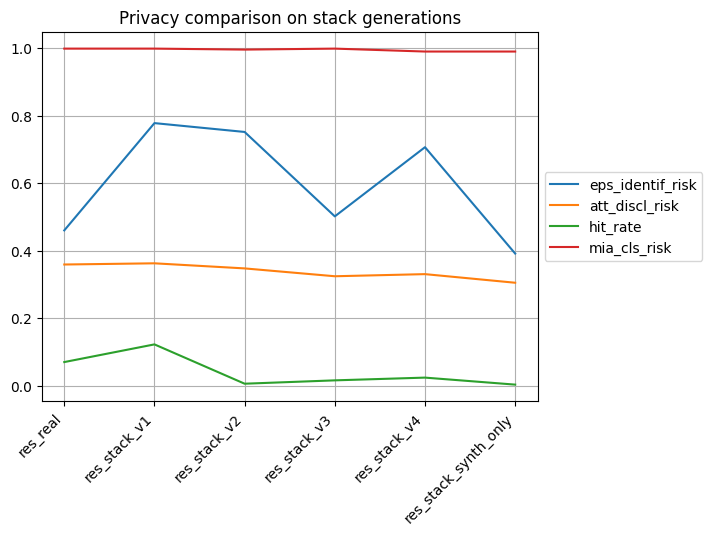

In [30]:
privacy_plot.plot.line()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [31]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

DCR_plot

,median_DCR
res_real,0.141679
res_stack_v1,0.122143
res_stack_v2,0.152889
res_stack_v3,0.182710
res_stack_v4,0.202303
res_stack_synth_only,0.255369


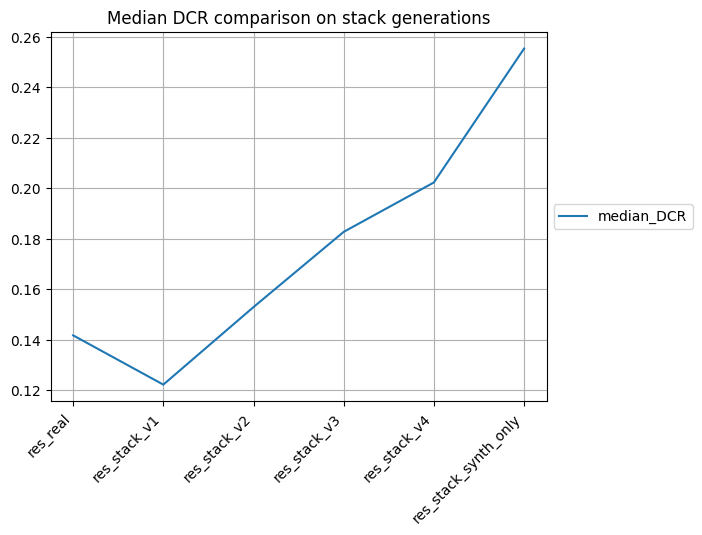

In [32]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [33]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.010441,0.011968,0.271628
res_stack_v1,0.013489,0.012649,0.426165
res_stack_v2,0.018233,0.018196,0.536703
res_stack_v3,0.022975,0.021496,0.505786
res_stack_v4,0.028189,0.014753,0.470042
res_stack_synth_only,0.030964,0.029370,0.607501


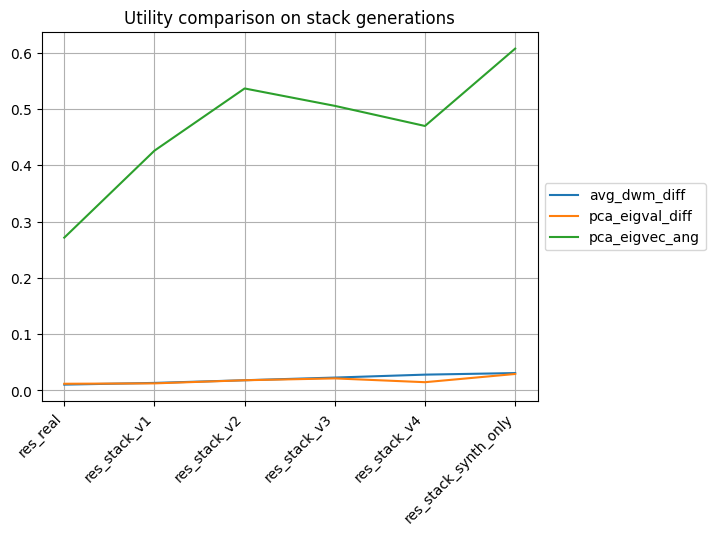

In [34]:
utility_plot.plot.line()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [35]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.701424,1.485455
res_stack_v1,0.811967,1.490058
res_stack_v2,0.905383,1.516735
res_stack_v3,0.889706,1.554538
res_stack_v4,0.860715,1.574889
res_stack_synth_only,0.994470,1.588185


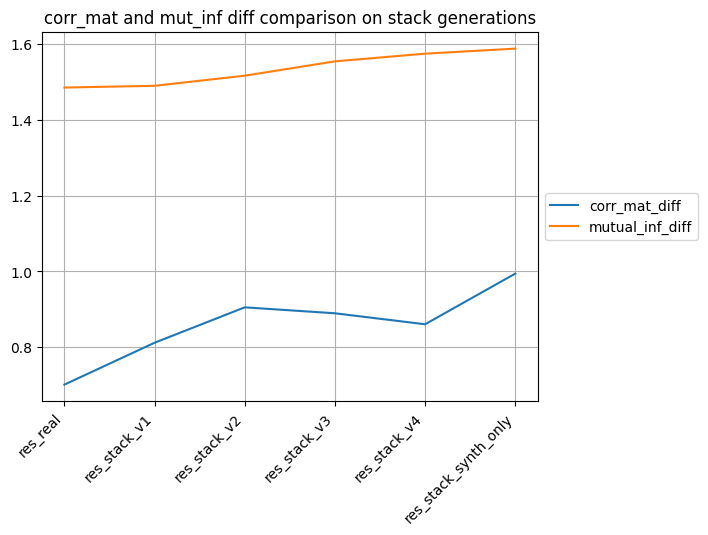

In [36]:
matrix_diff_plot.plot.line()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [38]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.010441,0.011968,0.271628,0.466702,0.701424,1.485455,0.036806,0.137931,0.002940,0.003492,0.485552,0.467035,0.346300,0.229994,0.182334,0.027978,0.070397,0.460289,0.998561,0.359293
res_stack_v1,0.013489,0.012649,0.426165,0.417961,0.811967,1.490058,0.039797,0.172414,0.002751,0.006282,0.578717,0.152660,0.348556,0.242238,0.159108,0.064079,0.122744,0.777978,0.998561,0.362828
res_stack_v2,0.018233,0.018196,0.536703,0.431244,0.905383,1.516735,0.042773,0.241379,0.002636,0.011996,0.589926,0.154735,0.374188,0.201685,0.147136,0.048736,0.006318,0.751805,0.995683,0.347741
res_stack_v3,0.022975,0.021496,0.505786,0.261464,0.889706,1.554538,0.050568,0.241379,0.004460,0.016690,0.623711,0.118352,0.405776,0.161071,0.140102,0.042419,0.016245,0.501805,0.998561,0.324511
res_stack_v4,0.028189,0.014753,0.470042,0.340392,0.860715,1.574889,0.051823,0.241379,0.003256,0.026295,0.634238,0.100807,0.364621,0.237004,0.131792,0.074007,0.024368,0.706679,0.989928,0.330786
res_stack_synth_only,0.030964,0.029370,0.607501,0.200478,0.994470,1.588185,0.053990,0.241379,0.003512,0.026141,0.646469,0.149899,0.422563,0.132792,0.123192,0.036101,0.003610,0.391697,0.989928,0.305291


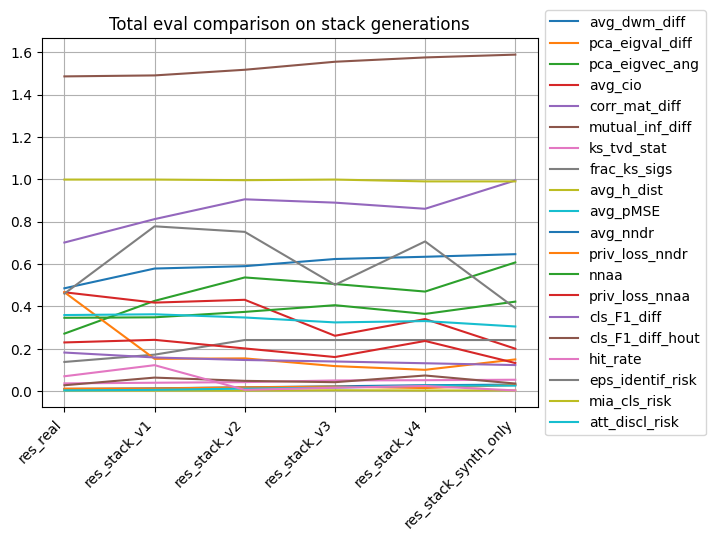

In [39]:
total_eval.plot.line()
plt.title("Total eval comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [40]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

overall_res

,Stacks,Utility,Privacy
0,res_real,0.892630,0.505090
1,res_stack_v1,0.879898,0.505406
2,res_stack_v2,0.870245,0.535459
3,res_stack_v3,0.853732,0.585484
4,res_stack_v4,0.859213,0.555532
5,res_stack_synth_only,0.842700,0.615401


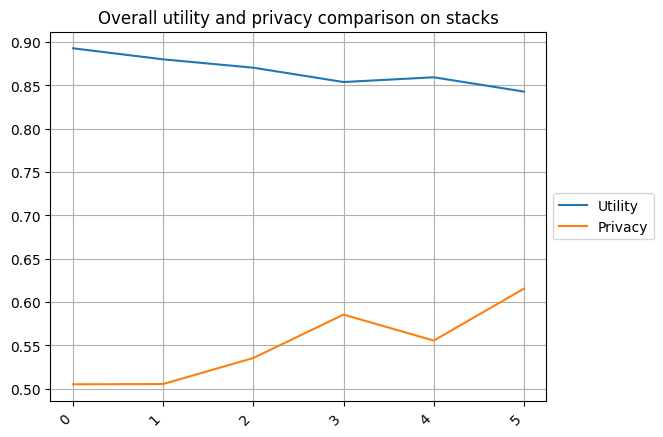

In [41]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on stacks")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()